In [5]:
"""
例題2：ボストンハウジングデータ
複数の要因から住宅の価格を予測する
@author: t.imai
"""
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# 入力する部分
max_epochs = 1000                      # 訓練のステップの数
filename_train = 'ex2_boston_traindata.csv'    # 訓練用データのファイル名
filename_test = 'ex2_boston_testdata.csv'      # 確認用データのファイル名
explanatory_start_column = 2     # 説明変数の最初の列の列番号 2列目であれば2
explanatory_end_column =12      # 説明変数の最後の列の列番号 14列目であれば14
outcome_column = 13          # 目的変数（教師データ）の列番号 15列目であれば15
# 入力はここまで

explanatory_variables = np.arange(explanatory_start_column-1, explanatory_end_column)    
outcome_variables = [outcome_column-1]               

'''
データの生成
'''
df1 = pd.read_csv(filename_train, skiprows=[0], header=None)
df2 = np.array(df1.values.tolist())
x_train = df2[:, explanatory_variables]
y_train = df2[:, outcome_variables]    

df3 = pd.read_csv(filename_test, skiprows=[0], header=None)
df4 = np.array(df3.values.tolist())
x_test = df4[:, explanatory_variables]
y_test = df4[:, outcome_variables] 

# 入力データを正規化
x_min = x_train.min(axis=0)
x_max = x_train.max(axis=0)
x_train = (x_train - x_min)/(x_max - x_min)
x_test = (x_test - x_min)/(x_max - x_min)

# モデルの構築
model = tf.keras.models.Sequential([
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dense(64, activation='relu'), 
  keras.layers.Dense(64, activation='relu'),     
  keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse'])

history = model.fit(x_train, y_train, epochs=max_epochs, verbose=0)

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
#pd.set_option('display.max_rows', 500)
print(hist)
#hist.tail()

test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test mae:', test_scores[1])


           loss        mae         mse  epoch
0    587.128353  22.393900  587.128296      0
1    545.199261  21.385975  545.199280      1
2    447.795016  18.760193  447.795013      2
3    280.240332  13.771653  280.240356      3
4    164.598916  10.188251  164.598907      4
..          ...        ...         ...    ...
995    2.756252   1.157630    2.756252    995
996    2.731389   1.142224    2.731389    996
997    2.796493   1.175671    2.796493    997
998    2.826273   1.163199    2.826273    998
999    2.856352   1.185229    2.856352    999

[1000 rows x 4 columns]
102/1 - 0s - loss: 14.9260 - mae: 2.3358 - mse: 20.5713
Test loss: 20.5713119319841
Test mae: 2.335821


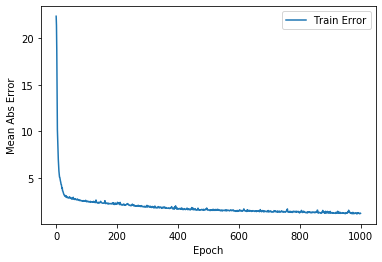

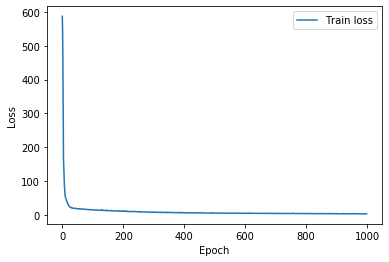

In [6]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
 
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.legend()
 
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.plot(hist['epoch'], hist['loss'],
           label='Train loss')
  plt.legend()
  plt.show()

plot_history(history)

In [7]:
# 予測値をcsvファイルに出力
val_y = model.predict(x_test)    
np.savetxt('prediction_boston.csv', val_y, delimiter=',')
print (val_y)    

[[28.682472 ]
 [26.057407 ]
 [22.159168 ]
 [17.985489 ]
 [22.883633 ]
 [17.635117 ]
 [24.274853 ]
 [34.927597 ]
 [24.820618 ]
 [31.753052 ]
 [10.868651 ]
 [29.195442 ]
 [32.80692  ]
 [13.263234 ]
 [18.38198  ]
 [15.319287 ]
 [20.838825 ]
 [ 8.815102 ]
 [15.326741 ]
 [23.105785 ]
 [23.106747 ]
 [17.721859 ]
 [17.856098 ]
 [16.429375 ]
 [21.86588  ]
 [32.863403 ]
 [47.99243  ]
 [11.698334 ]
 [22.017193 ]
 [12.221453 ]
 [27.256931 ]
 [21.86697  ]
 [22.755367 ]
 [20.110348 ]
 [36.272125 ]
 [16.147404 ]
 [15.022236 ]
 [19.016754 ]
 [18.332039 ]
 [20.104233 ]
 [16.278114 ]
 [23.835903 ]
 [29.609837 ]
 [10.696905 ]
 [ 9.39683  ]
 [34.654205 ]
 [11.416936 ]
 [17.505669 ]
 [20.723736 ]
 [20.005875 ]
 [16.029491 ]
 [20.340645 ]
 [18.916279 ]
 [21.156128 ]
 [18.319279 ]
 [14.397523 ]
 [17.377506 ]
 [24.479641 ]
 [21.378448 ]
 [15.934728 ]
 [24.298313 ]
 [25.971962 ]
 [ 9.339524 ]
 [25.629295 ]
 [ 6.8774157]
 [16.239616 ]
 [29.805847 ]
 [30.291374 ]
 [21.825825 ]
 [51.658054 ]
 [22.352028 ]
 [12.6